In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
shampoo = pd.read_csv("shampoo.csv")
shampoo.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [4]:
shampoo = pd.read_csv("shampoo.csv", index_col=[0], parse_dates=True,squeeze=True)

In [5]:
type(shampoo)

pandas.core.series.Series

<AxesSubplot:xlabel='Month'>

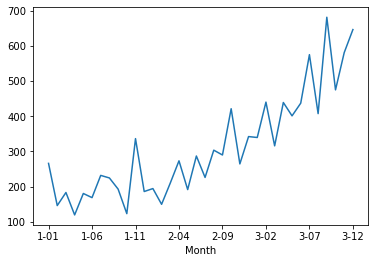

In [6]:
shampoo.plot()

In [7]:
shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

In [8]:
shampoo_ma = shampoo.rolling(window=10).mean()

<AxesSubplot:xlabel='Month'>

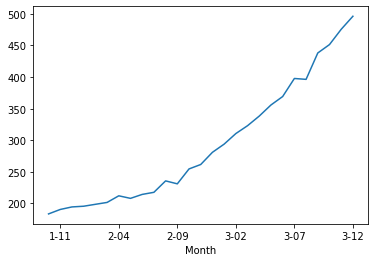

In [9]:
shampoo_ma.plot()

In [10]:
shampoo_base = pd.concat([shampoo, shampoo.shift(1)],axis=1)
shampoo_base.columns= ['Actual_Sales', 'Forecasting_Sales']
shampoo_base.dropna(inplace=True)
shampoo_base

,Actual_Sales,Forecasting_Sales
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3
1-07,231.8,168.5
1-08,224.5,231.8
1-09,192.8,224.5
1-10,122.9,192.8


In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
shampoo_error = mean_squared_error(shampoo_base.Actual_Sales,shampoo_base.Forecasting_Sales)
shampoo_error

11715.388285714285

In [13]:
np.sqrt(shampoo_error)

108.23764726616282

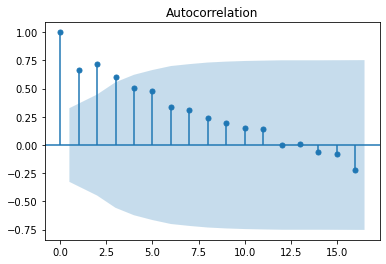

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(shampoo);

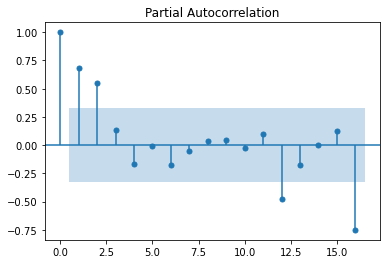

In [15]:
#q = 3, p = 2, d = 0 to 2
plot_pacf(shampoo);

In [16]:
from statsmodels.tsa.arima_model import ARIMA

shampoo_train = shampoo[0:24]
shampoo_test = shampoo[25:36]

In [17]:
shampoo_model = ARIMA(shampoo_train, order=(3,1,2))

E:\DataScience\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warning

In [18]:
shampoo_model_fit = shampoo_model.fit()
#shampoo_model_fit.aic
print(shampoo_model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   23
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -124.390
Method:                       css-mle   S.D. of innovations             46.803
Date:                Thu, 19 May 2022   AIC                            262.780
Time:                        15:06:47   BIC                            270.729
Sample:                             1   HQIC                           264.779
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.0854      4.194      1.689      0.091      -1.134      15.305
ar.L1.D.Sales    -0.2422      0.175     -1.387      0.165      -0.584       0.100
ar.L2.D.Sales    -0.4938      0.124     

                0
count   23.000000
mean    -8.636043
std     58.181420
min   -127.185361
25%    -48.914724
50%    -12.639433
75%     37.084278
max     94.221624


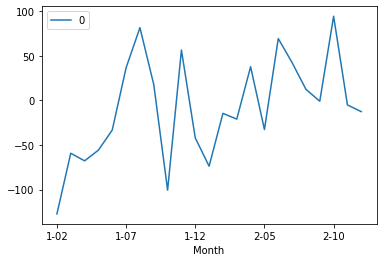

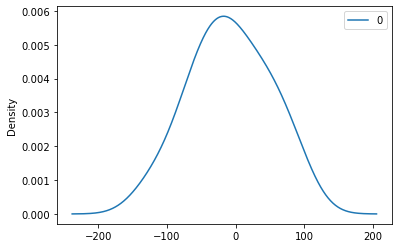

In [19]:
from pandas import DataFrame
residuals = DataFrame(shampoo_model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

In [20]:
shampoo_forecast = shampoo_model_fit.forecast(steps=11)[0]

In [21]:
np.sqrt(mean_squared_error(shampoo_test,shampoo_forecast))

144.7430119893492

In [23]:
history = [x for x in shampoo_train]
predictions = list()

In [25]:
for t in range(len(shampoo_test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = shampoo_test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

E:\DataScience\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=306.512995, expected=440.400000
predicted=379.024293, expected=315.900000
predicted=390.725804, expected=439.300000
predicted=351.195256, expected=401.300000
predicted=417.036401, expected=437.400000
predicted=419.488349, expected=575.500000
predicted=418.774181, expected=407.600000
predicted=513.184894, expected=682.000000
predicted=468.068246, expected=475.300000
predicted=613.737144, expected=581.300000
predicted=586.530747, expected=646.900000


In [27]:
rmse = np.sqrt(mean_squared_error(shampoo_test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 87.857


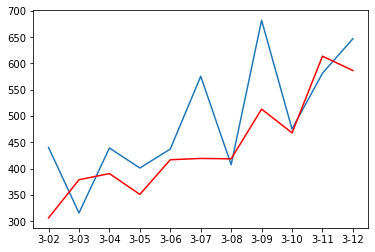

In [29]:
plt.plot(shampoo_test)
plt.plot(predictions, color='red')